### 1. Generating a Synthetic Dataset

To understand logistic regression, let's create a simple dataset with two features and a binary target variable (0 or 1).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate synthetic data for binary classification
X, y = make_classification(
    n_samples=100,      # Number of samples
    n_features=2,       # Number of features
    n_informative=2,    # Number of informative features
    n_redundant=0,      # Number of redundant features
    n_clusters_per_class=1, # Number of clusters per class
    random_state=42     # For reproducibility
)

# Convert to a Pandas DataFrame for easier handling
df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
df['target'] = y

print("First 5 rows of the dataset:")
display(df.head())

print("\nDistribution of the target variable:")
display(df['target'].value_counts())


First 5 rows of the dataset:


,feature_1,feature_2,target
0,1.228312,-0.757178,0
1,0.698409,-1.380295,0
2,2.548817,2.502258,1
3,0.573579,-1.352979,0
4,0.585900,-1.337457,0



Distribution of the target variable:


,count
target,
0,50
1,50


In [ ]:
df.describe()

,feature_1,feature_2,target
count,100.000000,100.000000,100.000000
mean,1.028202,0.016708,0.500000
std,0.793118,1.283873,0.502519
min,-0.858522,-2.263231,0.000000
25%,0.569325,-1.108991,0.000000
50%,0.942212,-0.345927,0.500000
75%,1.442614,1.006673,1.000000
max,3.174355,2.971213,1.000000


### 2. Visualizing the Dataset

Let's visualize the generated data to see how the two classes are distributed based on our features.

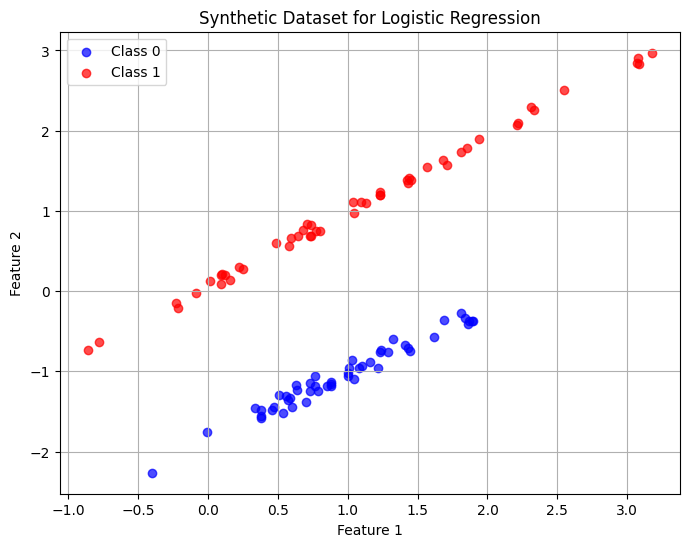

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df[df['target'] == 0]['feature_1'], df[df['target'] == 0]['feature_2'],
            color='blue', label='Class 0', alpha=0.7)
plt.scatter(df[df['target'] == 1]['feature_1'], df[df['target'] == 1]['feature_2'],
            color='red', label='Class 1', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


### 3. Training a Logistic Regression Model

Now, let's train a logistic regression model using our synthetic dataset. We'll split the data into training and testing sets to evaluate the model's performance on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully!")


Logistic Regression model trained successfully!


### 4. Making Predictions and Evaluating the Model

After training, we'll use the model to make predictions on the test set and evaluate its performance using common classification metrics like accuracy, precision, recall, and F1-score.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:")
display(pd.DataFrame(conf_matrix,
                     index=['Actual 0', 'Actual 1'],
                     columns=['Predicted 0', 'Predicted 1']))


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Confusion Matrix:


,Predicted 0,Predicted 1
Actual 0,15,0
Actual 1,0,15
